<a href="https://colab.research.google.com/github/jx-dohwan/Initial_public_offering_price_prediction/blob/main/sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (17.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122542 files and dir

In [2]:
# !unzip /content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터1.zip -d /content/drive/MyDrive/인공지능/경영빅데이터/data

In [3]:
import pandas as pd 

# df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.csv', encoding="cp949")
df = pd.read_excel('/content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_data_v2.xlsx')

In [4]:
df.head()

,기업명,종속변수,신규상장일,상장년도,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,...,자본금(백만원),공모규모(단위:억),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(주식수),유통가능주식합계(비율),ROE,적정주가
0,가온칩스,0,2022-05-20,2022,5,6,14,0.43,11000,13000,...,5744,280.0,0.75,0.00,0.25,11500000,3291700,0.2865,32.242340,NaN
1,강스템바이오텍,0,2015-12-21,2015,12,1,26,0.04,8000,10000,...,6908,120.0,0.77,0.03,0.20,13800000,8642375,0.6255,-53.763752,NaN
2,고바이오랩,1,2020-11-18,2020,11,2,20,0.10,18000,23000,...,7742,300.0,0.80,0.00,0.20,15400000,4252864,0.2759,-569.194007,NaN
3,공구우먼,0,2022-03-23,2022,3,6,18,0.33,26000,31000,...,367,280.0,0.74,0.01,0.25,3963211,1408500,0.3554,1184.196185,NaN
4,그레이트리치과기,0,2016-10-25,2016,10,1,14,0.07,4000,6000,...,13375,844.0,0.80,0.00,0.20,67500000,16900000,0.2500,0.000000,NaN


In [5]:
# 종속변수의 비율 확인
print(df['종속변수'].value_counts(normalize=True))


0    0.791667
1    0.208333
Name: 종속변수, dtype: float64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

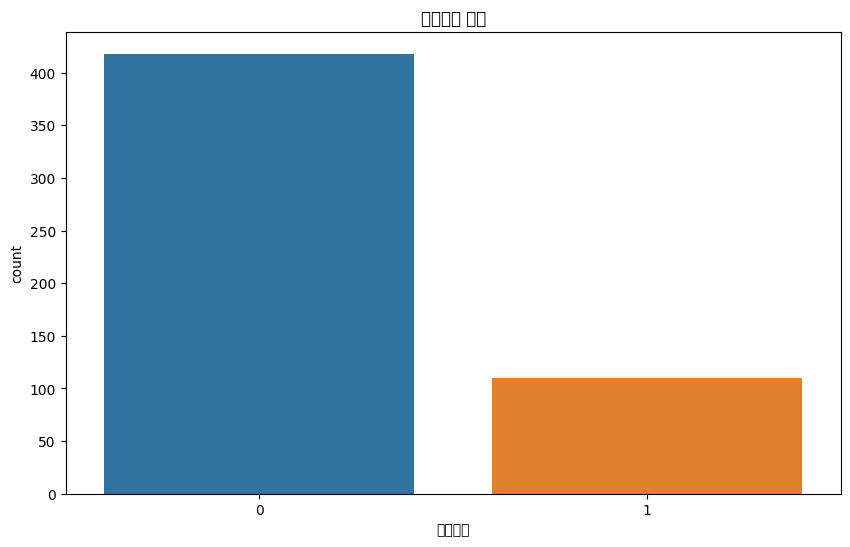

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='종속변수', data=df)
plt.title('종속변수 분포')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

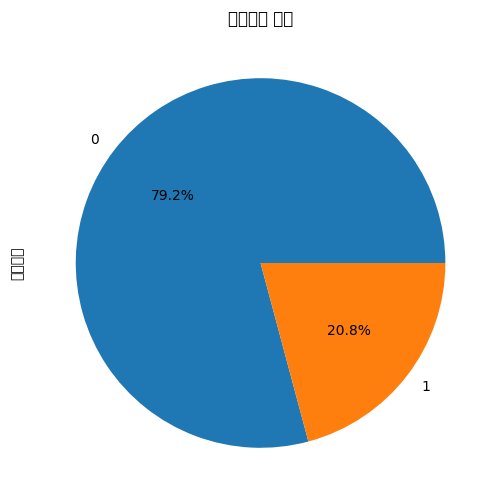

In [7]:
plt.figure(figsize=(10, 6))
df['종속변수'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('종속변수 분포')
plt.show()


## 기업명을 숫자 id로 변환

In [8]:
df['기업명'] = pd.factorize(df['기업명'])[0]
df['기업명']


0        0
1        1
2        2
3        3
4        4
      ... 
523    523
524    524
525    525
526    526
527    527
Name: 기업명, Length: 528, dtype: int64

In [9]:
df.head()

,기업명,종속변수,신규상장일,상장년도,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,...,자본금(백만원),공모규모(단위:억),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(주식수),유통가능주식합계(비율),ROE,적정주가
0,0,0,2022-05-20,2022,5,6,14,0.43,11000,13000,...,5744,280.0,0.75,0.00,0.25,11500000,3291700,0.2865,32.242340,NaN
1,1,0,2015-12-21,2015,12,1,26,0.04,8000,10000,...,6908,120.0,0.77,0.03,0.20,13800000,8642375,0.6255,-53.763752,NaN
2,2,1,2020-11-18,2020,11,2,20,0.10,18000,23000,...,7742,300.0,0.80,0.00,0.20,15400000,4252864,0.2759,-569.194007,NaN
3,3,0,2022-03-23,2022,3,6,18,0.33,26000,31000,...,367,280.0,0.74,0.01,0.25,3963211,1408500,0.3554,1184.196185,NaN
4,4,0,2016-10-25,2016,10,1,14,0.07,4000,6000,...,13375,844.0,0.80,0.00,0.20,67500000,16900000,0.2500,0.000000,NaN


In [10]:
df.set_index('기업명', inplace=True)
df.head()

,종속변수,신규상장일,상장년도,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,공모가,...,자본금(백만원),공모규모(단위:억),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(주식수),유통가능주식합계(비율),ROE,적정주가
기업명,,,,,,,,,,,,,,,,,,,,,
0,0,2022-05-20,2022,5,6,14,0.43,11000,13000,14000,...,5744,280.0,0.75,0.00,0.25,11500000,3291700,0.2865,32.242340,NaN
1,0,2015-12-21,2015,12,1,26,0.04,8000,10000,6000,...,6908,120.0,0.77,0.03,0.20,13800000,8642375,0.6255,-53.763752,NaN
2,1,2020-11-18,2020,11,2,20,0.10,18000,23000,15000,...,7742,300.0,0.80,0.00,0.20,15400000,4252864,0.2759,-569.194007,NaN
3,0,2022-03-23,2022,3,6,18,0.33,26000,31000,20000,...,367,280.0,0.74,0.01,0.25,3963211,1408500,0.3554,1184.196185,NaN
4,0,2016-10-25,2016,10,1,14,0.07,4000,6000,5000,...,13375,844.0,0.80,0.00,0.20,67500000,16900000,0.2500,0.000000,NaN


## 불필요한 칼럼삭제

In [11]:
df = df.drop(['신규상장일','상장년도', '주간사',  '신주모집','구주매출', '시장구분', '업종', '업종코드',
              '업종(대분류)한국표준산업분류(10차)', '기업구분', '공모규모(단위:억)', '유통가능주식합계(주식수)','적정주가'], axis=1)

In [12]:
df.head()

,종속변수,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,공모가,밴드수익률(공모가/공모가_상한),기관경쟁률,...,구주매출(비율),매출액(백만원),순이익(백만원),자본금(백만원),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(비율),ROE
기업명,,,,,,,,,,,,,,,,,,,,,
0,0,5,6,14,0.43,11000,13000,14000,1.08,1847.12,...,0.0,17098,1852,5744,0.75,0.00,0.25,11500000,0.2865,32.242340
1,0,12,1,26,0.04,8000,10000,6000,0.60,11.35,...,0.0,208,-3714,6908,0.77,0.03,0.20,13800000,0.6255,-53.763752
2,1,11,2,20,0.10,18000,23000,15000,0.65,64.33,...,0.0,577,-44067,7742,0.80,0.00,0.20,15400000,0.2759,-569.194007
3,0,3,6,18,0.33,26000,31000,20000,0.65,56.90,...,0.0,32683,4346,367,0.74,0.01,0.25,3963211,0.3554,1184.196185
4,0,10,1,14,0.07,4000,6000,5000,0.83,140.75,...,0.0,28652,0,13375,0.80,0.00,0.20,67500000,0.2500,0.000000


In [13]:
df.isnull().sum()

종속변수                               0
상장 시기(상장월)                         0
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)    0
최근 3개월 공모주 수                       0
최근 "따" 비율                          0
희망공모가_하한                           0
희망공모가_상한                           0
공모가                                0
밴드수익률(공모가/공모가_상한)                  0
기관경쟁률                              0
청약경쟁률                              0
의무보유확약                             0
대표주간사                              0
IPO 주간사 순위                         0
총 공모주식 수                           0
구주매출(비율)                           2
매출액(백만원)                           0
순이익(백만원)                           0
자본금(백만원)                           0
전문투자자(비율)                          0
우리사주조합(비율)                         0
일반청약자(비율)                          0
공모후 상장주식수(주식수)                     0
유통가능주식합계(비율)                       0
ROE                                0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 527
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   종속변수                             526 non-null    int64  
 1   상장 시기(상장월)                       526 non-null    int64  
 2   최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  526 non-null    int64  
 3   최근 3개월 공모주 수                     526 non-null    int64  
 4   최근 "따" 비율                        526 non-null    float64
 5   희망공모가_하한                         526 non-null    int64  
 6   희망공모가_상한                         526 non-null    int64  
 7   공모가                              526 non-null    int64  
 8   밴드수익률(공모가/공모가_상한)                526 non-null    float64
 9   기관경쟁률                            526 non-null    float64
 10  청약경쟁률                            526 non-null    float64
 11  의무보유확약                           526 non-null    float64
 12  대표주간사                 

In [16]:
print(df.describe())

             종속변수  상장 시기(상장월)  최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  최근 3개월 공모주 수  \
count  526.000000  526.000000                       526.000000    526.000000   
mean     0.209125    7.665399                         3.507605     16.889734   
std      0.407071    3.453393                         3.415781      6.335329   
min      0.000000    1.000000                         0.000000      1.000000   
25%      0.000000    5.000000                         1.000000     13.000000   
50%      0.000000    8.000000                         2.000000     17.000000   
75%      0.000000   11.000000                         5.000000     21.000000   
max      1.000000   12.000000                        17.000000     34.000000   

        최근 "따" 비율       희망공모가_하한       희망공모가_상한            공모가  \
count  526.000000     526.000000     526.000000     526.000000   
mean     0.209449   16740.750951   20049.068441   18391.558935   
std      0.176247   17543.837976   20390.984126   16749.496147   
min      0.0000

## Object를 int로 변환

In [17]:
# '주간사' 열의 고유한 값들을 추출
unique_agents = df['대표주간사'].unique()

# 각 범주에 대한 고유한 정수를 생성
# 이를 위해 범주를 인덱스로 변환하고, 인덱스를 범주에 매핑하는 딕셔너리를 생성
agent_to_int = {agent: i for i, agent in enumerate(unique_agents)}

# 매핑을 데이터에 적용하여 '주간사' 열을 정수로 변환
df['대표주간사'] = df['대표주간사'].map(agent_to_int)

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 527
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   종속변수                             526 non-null    int64  
 1   상장 시기(상장월)                       526 non-null    int64  
 2   최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  526 non-null    int64  
 3   최근 3개월 공모주 수                     526 non-null    int64  
 4   최근 "따" 비율                        526 non-null    float64
 5   희망공모가_하한                         526 non-null    int64  
 6   희망공모가_상한                         526 non-null    int64  
 7   공모가                              526 non-null    int64  
 8   밴드수익률(공모가/공모가_상한)                526 non-null    float64
 9   기관경쟁률                            526 non-null    float64
 10  청약경쟁률                            526 non-null    float64
 11  의무보유확약                           526 non-null    float64
 12  대표주간사                 

## 데이터 오버샘플링

In [20]:
df.isnull().sum()

종속변수                               0
상장 시기(상장월)                         0
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)    0
최근 3개월 공모주 수                       0
최근 "따" 비율                          0
희망공모가_하한                           0
희망공모가_상한                           0
공모가                                0
밴드수익률(공모가/공모가_상한)                  0
기관경쟁률                              0
청약경쟁률                              0
의무보유확약                             0
대표주간사                              0
IPO 주간사 순위                         0
총 공모주식 수                           0
구주매출(비율)                           0
매출액(백만원)                           0
순이익(백만원)                           0
자본금(백만원)                           0
전문투자자(비율)                          0
우리사주조합(비율)                         0
일반청약자(비율)                          0
공모후 상장주식수(주식수)                     0
유통가능주식합계(비율)                       0
ROE                                0
dtype: int64

In [21]:
from imblearn.over_sampling import SMOTE
X = df.drop('종속변수',  axis=1)
y = df['종속변수']

In [22]:
X.isnull().sum()

상장 시기(상장월)                         0
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)    0
최근 3개월 공모주 수                       0
최근 "따" 비율                          0
희망공모가_하한                           0
희망공모가_상한                           0
공모가                                0
밴드수익률(공모가/공모가_상한)                  0
기관경쟁률                              0
청약경쟁률                              0
의무보유확약                             0
대표주간사                              0
IPO 주간사 순위                         0
총 공모주식 수                           0
구주매출(비율)                           0
매출액(백만원)                           0
순이익(백만원)                           0
자본금(백만원)                           0
전문투자자(비율)                          0
우리사주조합(비율)                         0
일반청약자(비율)                          0
공모후 상장주식수(주식수)                     0
유통가능주식합계(비율)                       0
ROE                                0
dtype: int64

In [23]:
y.isnull().sum()

0

In [24]:
from imblearn.over_sampling import SMOTE
X = df.drop('종속변수',  axis=1)
y = df['종속변수']
# 오버샘플링
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


In [25]:
import pandas as pd

# X_resampled와 y_resampled를 DataFrame으로 변환
df_resampled = pd.DataFrame(X_res, columns=X.columns)  # X.columns는 원래 데이터의 feature 이름들입니다.
df_resampled['종속변수'] = y_res

# DataFrame을 csv 파일로 저장
df_resampled.to_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/IPOv3_resampled_data.csv', index=False)


## 확인하기

In [26]:
import pandas as pd 

df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/IPOv3_resampled_data.csv')

In [27]:
df.head()

,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,공모가,밴드수익률(공모가/공모가_상한),기관경쟁률,청약경쟁률,...,매출액(백만원),순이익(백만원),자본금(백만원),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(비율),ROE,종속변수
0,5,6,14,0.43,11000,13000,14000,1.08,1847.12,2183.29,...,17098,1852,5744,0.75,0.00,0.25,11500000,0.2865,32.242340,0
1,12,1,26,0.04,8000,10000,6000,0.60,11.35,40.92,...,208,-3714,6908,0.77,0.03,0.20,13800000,0.6255,-53.763752,0
2,11,2,20,0.10,18000,23000,15000,0.65,64.33,566.54,...,577,-44067,7742,0.80,0.00,0.20,15400000,0.2759,-569.194007,1
3,3,6,18,0.33,26000,31000,20000,0.65,56.90,7.53,...,32683,4346,367,0.74,0.01,0.25,3963211,0.3554,1184.196185,0
4,10,1,14,0.07,4000,6000,5000,0.83,140.75,7.01,...,28652,0,13375,0.80,0.00,0.20,67500000,0.2500,0.000000,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   상장 시기(상장월)                       832 non-null    int64  
 1   최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  832 non-null    int64  
 2   최근 3개월 공모주 수                     832 non-null    int64  
 3   최근 "따" 비율                        832 non-null    float64
 4   희망공모가_하한                         832 non-null    int64  
 5   희망공모가_상한                         832 non-null    int64  
 6   공모가                              832 non-null    int64  
 7   밴드수익률(공모가/공모가_상한)                832 non-null    float64
 8   기관경쟁률                            832 non-null    float64
 9   청약경쟁률                            832 non-null    float64
 10  의무보유확약                           832 non-null    float64
 11  대표주간사                            832 non-null    int64  
 12  IPO 주간사 순위            